# Table of Contents

### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))

### 0.3 Exploring Original df

In [4]:
df.shape

(49693, 5)

In [5]:
df.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


In [6]:
df.tail()

,product_id,product_name,aisle_id,department_id,prices
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7
49692,49688,Fresh Foaming Cleanser,73,11,13.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49693 non-null  int64  
 1   product_name   49677 non-null  object 
 2   aisle_id       49693 non-null  int64  
 3   department_id  49693 non-null  int64  
 4   prices         49693 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


All of the columns are useful, but prices should really be renamed 'price' and some of the datatypes could be made more efficient.

In [8]:
df.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


All the rows have the same count, so it is unlikely to have any missing values.

However, the max price seems out of line for a df consisting of grocery items.


### 0.4 Renaming columns

In [9]:
# Because prices because it implies multiples prices when it is only one.
df.rename(columns = {'prices' : 'price'}, inplace = True)

In [10]:
# Confirming the change
df.head()

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


### 0.5 Adjusting datatypes to be more appropriate for variables

In [11]:
# product_id ranges between 1 and 50k
# so int32 is more than sufficient and allows room for growth
df['product_id'] = df['product_id'].astype('int32')

In [12]:
# aisle_id ranges between 1 and 134
# department_id ranges between 1 and 21
# and int16 will allow each to grow up to over 32k
df['aisle_id'] = df['aisle_id'].astype('int16')
df['department_id'] = df['department_id'].astype('int16')

In [13]:
# price ranges between 1 and 100k
# so float32 is more appropriate than float64
df['price'] = df['price'].astype('float32')

In [14]:
# Confirming the changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49693 non-null  int32  
 1   product_name   49677 non-null  object 
 2   aisle_id       49693 non-null  int16  
 3   department_id  49693 non-null  int16  
 4   price          49693 non-null  float32
dtypes: float32(1), int16(2), int32(1), object(1)
memory usage: 970.7+ KB


### 0.6 Cleaning data

#### 0.6.1 Overall df checks

In [15]:
# Checking for nulls across df
df.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
price             0
dtype: int64

When we clean the 'product_name' column, those 16 missing values will be addressed.

In [16]:
# Check for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

product_name


Additionally, the mixed data types in the 'product_name' column will be addressed.

In [17]:
# Checking for whole-row duplicates
dups = df[df.duplicated()]

In [18]:
dups.shape

(5, 5)

The dataframe of dups has five duplicated rows. 

In [19]:
# Exploring duplicates
dups

,product_id,product_name,aisle_id,department_id,price
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [20]:
# Shape of df BEFORE removing duplicates
df.shape

(49693, 5)

In [21]:
# Remove duplicates
df = df.drop_duplicates()

In [22]:
# Shape of df AFTER removing duplicates
df.shape

(49688, 5)

The new df correctly shows 5 fewer rows.

#### 0.6.2 - product_id cleaning/wrangling

In [23]:
# Exploring the data for this column
df['product_id'].describe()

count    49688.000000
mean     24844.500040
std      14343.834402
min          1.000000
25%      12422.750000
50%      24844.500000
75%      37266.250000
max      49688.000000
Name: product_id, dtype: float64

In [24]:
# Confirming uniqueness of product_id numbers
df.product_id.nunique()

49686

Since the number of unique product_ids does not match the count of product_id there must be some duplication.

In [25]:
# Checking for number of duplicates
df['product_id'].duplicated().sum()

2

In [26]:
# Identifying which product numbers are duplicated
dups_prod_id = df[df.duplicated('product_id')]

In [27]:
dups_prod_id

,product_id,product_name,aisle_id,department_id,price
6800,6800,Sprouted Quinoa Flakes Baby Cereal,92,18,14.0
26521,26520,Cheese Shredded Sharp Cheddar Reduced Fat 2%,21,16,2.9


In [28]:
# Looking at the duplicates to see if there is a way to fix this
df[df['product_id'] == 6800]

,product_id,product_name,aisle_id,department_id,price
6799,6800,Revive Zero Vitamin Water,64,7,6.4
6800,6800,Sprouted Quinoa Flakes Baby Cereal,92,18,14.0


In [29]:
df[df['product_id'] == 26520]

,product_id,product_name,aisle_id,department_id,price
26520,26520,Clinical Advanced Solid Ultimate Fresh Anti-Pe...,80,11,10.6
26521,26520,Cheese Shredded Sharp Cheddar Reduced Fat 2%,21,16,2.9


The duplicated product_id numbers go to very different products, so it isn't a simple case of standardizing a product_name.  These products will have to be dropped.

In [30]:
# Create a list of product_ids to be dropped
values = [6800, 26520]

In [31]:
# Checking the shape before dropping those product_ids
df.shape

(49688, 5)

In [32]:
# Overwrite the df without the duplicated products.
df = df[df.product_id.isin(values) == False]

In [33]:
# Checking the shape AFTER dropping those product_ids
df.shape

(49684, 5)

The new df correctly shows 4 rows dropped. 
(2 rows for each of the 2 duplicated product_ids)

In [34]:
# Confirming uniqueness of product_id numbers
df.product_id.nunique()

49684

#### 0.6.3 - product_name cleaning/wrangling

In [35]:
# Exploring the data for this column
df['product_name'].describe()

count                          49668
unique                         49668
top       Chocolate Sandwich Cookies
freq                               1
Name: product_name, dtype: object

The good news is that the product names are all unique.
The bad news is that 16 products are missing names.

The client (a.k.a. the instructions for this task) wants these rows removed rather than a flag being inserted

In [36]:
# Create a subset of products to investigate missing product names
df_prod_nan = df[df['product_name'].isnull() == True]

In [37]:
len(df_prod_nan)

16

In [38]:
df_prod_nan

,product_id,product_name,aisle_id,department_id,price
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


In [39]:
# Shape of products df BEFORE removing products with missing names
df.shape

(49684, 5)

In [40]:
# Create new df with only products that have a name
df = df[df['product_name'].isnull() == False]

In [41]:
# Shape of products df AFTER removing products with missing names
df.shape

(49668, 5)

In [42]:
df['product_name'].describe()

count                          49668
unique                         49668
top       Chocolate Sandwich Cookies
freq                               1
Name: product_name, dtype: object

Now the number of rows and number of unique product names match up.

In [43]:
# Confirming that the removal of the NaN values 
# has resolved the mixed-data problem for this column.
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

#### 0.6.4 - aisle_id cleaning/wrangling

In [44]:
#Exploring the data for this column
df['aisle_id'].describe()

count    49668.000000
mean        67.762724
std         38.316555
min          1.000000
25%         35.000000
50%         69.000000
75%        100.000000
max        134.000000
Name: aisle_id, dtype: float64

In [45]:
# Checking the uniqueness of order_id numbers
df.aisle_id.nunique()

134

In [46]:
df['aisle_id'].value_counts(dropna=False).sort_index()

1      146
2      271
3      832
4      543
5      409
      ... 
130    303
131    457
132    178
133    172
134     95
Name: aisle_id, Length: 134, dtype: int64

The aisle_id variable ranges from 1 to 134.

#### 0.6.5 - department_id cleaning/wrangling

In [47]:
#Exploring the data for this column
df['department_id'].describe()

count    49668.000000
mean        11.728839
std          5.850876
min          1.000000
25%          7.000000
50%         13.000000
75%         17.000000
max         21.000000
Name: department_id, dtype: float64

In [48]:
df.department_id.nunique()

21

There are 206,209 unique users in this df.

In [49]:
df['department_id'].value_counts(dropna=False).sort_index()

1     4006
2      548
3     1515
4     1684
5     1054
6     1139
7     4362
8      971
9     1858
10      38
11    6559
12     906
13    5369
14    1114
15    2092
16    3444
17    3085
18    1080
19    6264
20    1322
21    1258
Name: department_id, dtype: int64

The department_id variable ranges from 1 to 21.

#### 0.6.6 - price cleaning/wrangling

In [50]:
#Exploring the data for this column
df['price'].describe()

count    49668.000000
mean         9.993435
std        453.625549
min          1.000000
25%          4.100000
50%          7.100000
75%         11.100000
max      99999.000000
Name: price, dtype: float64

In [51]:
# Checking for and exploring outliers
df['price'].value_counts(dropna=False).sort_index()

1.000000        116
1.100000        296
1.200000        296
1.300000        286
1.400000        321
               ... 
24.799999         5
24.900000         6
25.000000         5
14900.000000      1
99999.000000      1
Name: price, Length: 242, dtype: int64

<AxesSubplot:xlabel='price', ylabel='price'>

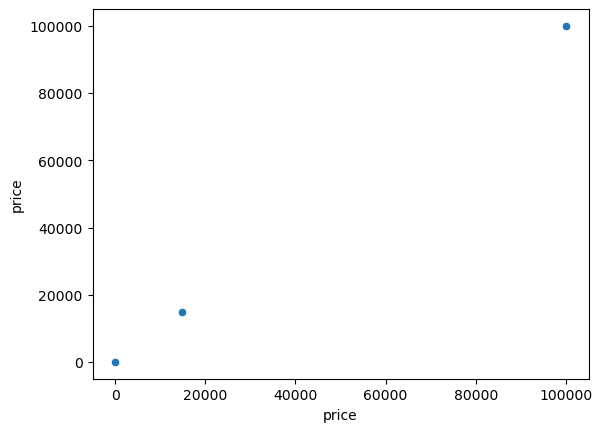

In [51]:
# Making a scatterplot to confirm there are only the two outliers
sns.scatterplot(x = 'price', y = 'price',data = df)

In [52]:
# Creating a subset of items where the price is > 100
# which would be unlikely for a grocery items
expensive_items = df[df['price'] > 100]

In [53]:
expensive_items

,product_id,product_name,aisle_id,department_id,price
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


Let's see if we can find out the correct price for the cottage cheese.  Perhaps 1.49 or 14.90?

In [54]:
cottage_cheese = df[df['product_name'].str.contains('Cottage Cheese')]

In [55]:
cottage_cheese

,product_id,product_name,aisle_id,department_id,price
194,195,Grade A Pasteurized 2% Milkfat Lowfat Cottage ...,108,16,3.3
1503,1503,Low Fat Cottage Cheese,108,16,6.7
2577,2577,2% Milk Fat Creamy Small Curd Cottage Cheese,100,21,6.5
2943,2943,"Low Fat, Small Curd 1% Milkfat No Salt Added C...",108,16,2.2
3940,3940,Nonfat Cottage Cheese,108,16,3.3
...,...,...,...,...,...
46330,46326,Grade A Pasturized Lowfat Cottage Cheese,108,16,9.7
46791,46787,Fat Free Cottage Cheese,108,16,3.4
47109,47105,Organic Pineapple Cottage Cheese,100,21,12.6
47111,47107,4% Milkfat Small Curd Grade A Pasteurized Cott...,108,16,6.4


It's unclear what the correct price would be for either product, so, per customer's wishes (a.k.a. CareerFoundry instructions), outlying prices will be rewritten as null values (NaN)

In [56]:
# Rewriting outlying prices (>100) as null values (NaN)
df.loc[df['price'] >100, 'price'] = np.nan

In [57]:
# Checking that there are now only two null prices.
df['price'].isnull().sum()

2

In [58]:
df['price'].describe()

count    49666.000000
mean         7.680408
std          4.199336
min          1.000000
25%          4.100000
50%          7.100000
75%         11.100000
max         25.000000
Name: price, dtype: float64

The price column now ranges between 1 and 25 (which is much more reasonable for a maximum for a grocery item).  

### 0.7 Export clean df

In [59]:
# Confirming final shape and datetypes
df.shape

(49668, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49668 entries, 0 to 49692
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49668 non-null  int32  
 1   product_name   49668 non-null  object 
 2   aisle_id       49668 non-null  int16  
 3   department_id  49668 non-null  int16  
 4   price          49666 non-null  float32
dtypes: float32(1), int16(2), int32(1), object(1)
memory usage: 1.3+ MB


In [61]:
# Export df as customers_clean
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'products_clean.pkl'))